In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import joblib
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [51]:
df_raw = pd.read_csv(r'SBS_Processed_Datasets/04_2_Non_scaled_dataframe.csv')
df_scaled = pd.read_csv(r'SBS_Processed_Datasets/04_1_scaled_dataframe.csv')

In [52]:
df_raw.head(2)


,owner_no,model_year,price,registered_year,kms_driven,mileage_kmpl,engine_cc,car_age,model_age,registration_lag,normalized_model_age,mileage_normalized,high_mileage,multiple_owners,brand_popularity,kms_per_year,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata,transmission_automatic,transmission_manual,fuel_type_cng,fuel_type_diesel,fuel_type_lpg,fuel_type_petrol,kms_High,kms_Low,kms_Moderate,kms_Unused,kms_Very_Low,brand_encoded,variant_name_encoded,model_encoded
0,3,2015,400000.0,2015,120000.0,23.1,998,9,9,0,0.900000,0.648876,0,1,503886.023982,12000.000000,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,18,424566.346883,440245.033113
1,2,2018,811000.0,2018,32706.0,17.0,1497,6,6,0,0.857143,0.477528,0,1,538652.329749,4672.285714,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,6,787214.285714,683109.090909


In [53]:
df_scaled.head(2)

,owner_no,model_year,price,registered_year,kms_driven,mileage_kmpl,engine_cc,car_age,model_age,registration_lag,normalized_model_age,mileage_normalized,high_mileage,multiple_owners,brand_popularity,kms_per_year,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata,transmission_automatic,transmission_manual,fuel_type_cng,fuel_type_diesel,fuel_type_lpg,fuel_type_petrol,kms_High,kms_Low,kms_Moderate,kms_Unused,kms_Very_Low,brand_encoded,variant_name_encoded,model_encoded
0,2.498899,2015,400000.0,2015,1.342725,1.005949,-0.899893,0.328319,0.312143,-0.206056,0.585429,1.005949,0,1,-0.586069,0.808395,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,18,424566.346883,440245.033113
1,0.955492,2018,811000.0,2018,-0.624108,-0.745016,0.407365,-0.441225,-0.459648,-0.206056,0.084689,-0.745016,0,1,-0.419329,-0.432876,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,6,787214.285714,683109.090909


In [54]:
df_raw.columns

Index(['owner_no', 'model_year', 'price', 'registered_year', 'kms_driven',
       'mileage_kmpl', 'engine_cc', 'car_age', 'model_age', 'registration_lag',
       'normalized_model_age', 'mileage_normalized', 'high_mileage',
       'multiple_owners', 'brand_popularity', 'kms_per_year', 'city_bangalore',
       'city_chennai', 'city_delhi', 'city_hyderabad', 'city_jaipur',
       'city_kolkata', 'transmission_automatic', 'transmission_manual',
       'fuel_type_cng', 'fuel_type_diesel', 'fuel_type_lpg',
       'fuel_type_petrol', 'kms_High', 'kms_Low', 'kms_Moderate', 'kms_Unused',
       'kms_Very_Low', 'brand_encoded', 'variant_name_encoded',
       'model_encoded'],
      dtype='object')

In [55]:
# from sklearn.model_selection import train_test_split

# Target column
y = df_raw['price']

# Scaled dataset
X_scaled = df_scaled.drop('price', axis=1)
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Unscaled (raw) dataset
X_raw = df_raw.drop('price', axis=1)
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

### ModelTraining

#### Linear Regression (Scaled Data)

In [56]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression on scaled data
lr = LinearRegression()
lr.fit(X_scaled_train, y_train)

# Predictions
y_pred = lr.predict(X_scaled_test)

# Evaluation
print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Linear Regression Performance:
MAE: 73157.60686693779
MSE: 11597005674.76819
R²: 0.9116721560140955


#### Decision Tree (Raw Data)

In [57]:
# from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_raw_train, y_train)

# Predictions and Evaluation
y_pred_dt = dt.predict(X_raw_test)
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

Decision Tree Performance:
MAE: 80990.43019554342
MSE: 15630543673.055178
R²: 0.8809509746147397


#### Random Forest (Raw Data)

In [58]:
# from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_raw_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf.predict(X_raw_test)
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 56037.606585136105
MSE: 6964765714.4275055
R²: 0.9469533122018907


Gradient Boosting (Raw Data)

In [59]:
# from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting
gb = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gb.fit(X_raw_train, y_train)

# Predictions and Evaluation
y_pred_gb = gb.predict(X_raw_test)
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting Performance:
MAE: 61770.02297716885
MSE: 7773940540.323203
R²: 0.9407902844528795


In [60]:
# Collect model performance metrics
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "MAE": [
        mean_absolute_error(y_test, y_pred),        # Linear Regression
        mean_absolute_error(y_test, y_pred_dt),    # Decision Tree
        mean_absolute_error(y_test, y_pred_rf),    # Random Forest
        mean_absolute_error(y_test, y_pred_gb)     # Gradient Boosting
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred),        # Linear Regression
        mean_squared_error(y_test, y_pred_dt),    # Decision Tree
        mean_squared_error(y_test, y_pred_rf),    # Random Forest
        mean_squared_error(y_test, y_pred_gb)     # Gradient Boosting
    ],
    "R²": [
        r2_score(y_test, y_pred),                 # Linear Regression
        r2_score(y_test, y_pred_dt),             # Decision Tree
        r2_score(y_test, y_pred_rf),             # Random Forest
        r2_score(y_test, y_pred_gb)              # Gradient Boosting
    ]
}

# Create a results DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


               Model           MAE           MSE        R²
0  Linear Regression  73157.606867  1.159701e+10  0.911672
1      Decision Tree  80990.430196  1.563054e+10  0.880951
2      Random Forest  56037.606585  6.964766e+09  0.946953
3  Gradient Boosting  61770.022977  7.773941e+09  0.940790


As per results RANDOM_FOREST Performs best

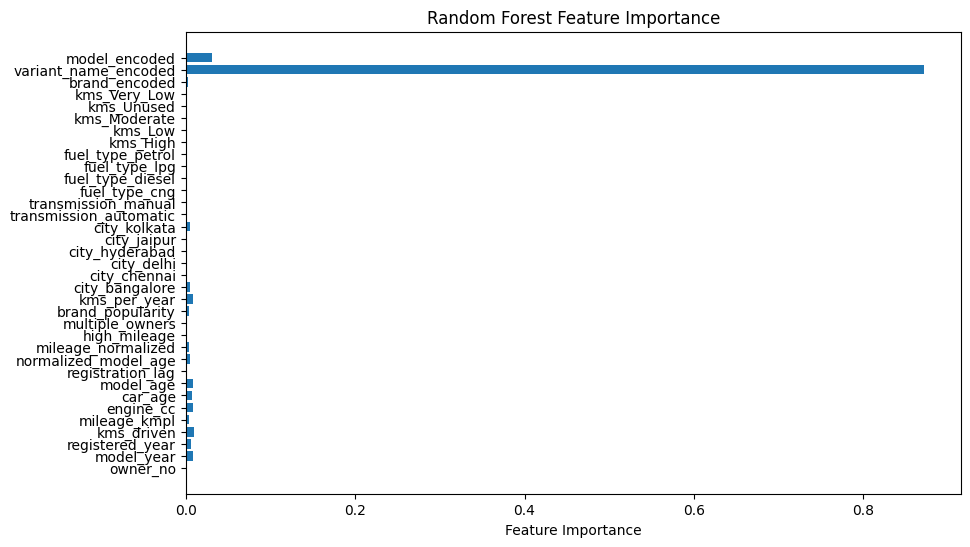

In [61]:
# RANDOM FOREST VISUALIZATION
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
features = X_raw.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


### HYPER TUNING

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, 
                               n_iter=50, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_raw_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", rf_random.best_params_)

# Best model evaluation
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_raw_test)

print("Optimized Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("R²:", r2_score(y_test, y_pred_best_rf))


Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 30}
Optimized Random Forest Performance:
MAE: 56203.0182477274
MSE: 7142131105.118742
R²: 0.9456024201702036


In [63]:
# import joblib

# Save the best-tuned Random Forest model
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')
joblib.dump(X_raw.columns.tolist(), r'PKL_Files/model_columns.pkl')  # Save column names

print("Optimized Random Forest model saved as 'optimized_random_forest_model.pkl'")


Optimized Random Forest model saved as 'optimized_random_forest_model.pkl'


In [64]:
X_raw.columns

Index(['owner_no', 'model_year', 'registered_year', 'kms_driven',
       'mileage_kmpl', 'engine_cc', 'car_age', 'model_age', 'registration_lag',
       'normalized_model_age', 'mileage_normalized', 'high_mileage',
       'multiple_owners', 'brand_popularity', 'kms_per_year', 'city_bangalore',
       'city_chennai', 'city_delhi', 'city_hyderabad', 'city_jaipur',
       'city_kolkata', 'transmission_automatic', 'transmission_manual',
       'fuel_type_cng', 'fuel_type_diesel', 'fuel_type_lpg',
       'fuel_type_petrol', 'kms_High', 'kms_Low', 'kms_Moderate', 'kms_Unused',
       'kms_Very_Low', 'brand_encoded', 'variant_name_encoded',
       'model_encoded'],
      dtype='object')

In [65]:
X_scaled.columns

Index(['owner_no', 'model_year', 'registered_year', 'kms_driven',
       'mileage_kmpl', 'engine_cc', 'car_age', 'model_age', 'registration_lag',
       'normalized_model_age', 'mileage_normalized', 'high_mileage',
       'multiple_owners', 'brand_popularity', 'kms_per_year', 'city_bangalore',
       'city_chennai', 'city_delhi', 'city_hyderabad', 'city_jaipur',
       'city_kolkata', 'transmission_automatic', 'transmission_manual',
       'fuel_type_cng', 'fuel_type_diesel', 'fuel_type_lpg',
       'fuel_type_petrol', 'kms_High', 'kms_Low', 'kms_Moderate', 'kms_Unused',
       'kms_Very_Low', 'brand_encoded', 'variant_name_encoded',
       'model_encoded'],
      dtype='object')